In [167]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import string
from nltk.corpus import gutenberg, stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from collections import Counter

In [168]:
movies = pd.read_csv('wiki_movie_plots_deduped.csv')
movies = movies[movies.Genre.str.contains('unknown') == False]
movies = movies[movies.Genre.str.contains('/') == False]
movies = movies[movies.Genre.str.contains(' ') == False]
movies = movies[movies['Release Year'] >= 1960]
movies = movies.groupby("Genre").filter(lambda x: len(x) > 190)
#movies = movies.Plot.apply(lambda x: x.lower())
movies.shape

(11240, 8)

In [169]:
movies.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
7340,1960,The Dark at the Top of the Stairs,American,Delbert Mann,"Robert Preston, Dorothy McGuire, Eve Arden, Sh...",drama,https://en.wikipedia.org/wiki/The_Dark_at_the_...,"During Prohibition in Oklahoma, Rubin Flood is..."
7341,1960,Desire in the Dust,American,Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett",drama,https://en.wikipedia.org/wiki/Desire_in_the_Dust,"Lonnie Wilson (Ken Scott), the son of a sharec..."
7343,1960,Elmer Gantry,American,Richard Brooks,"Burt Lancaster, Jean Simmons, Arthur Kennedy, ...",drama,https://en.wikipedia.org/wiki/Elmer_Gantry_(film),Elmer Gantry (Burt Lancaster) is a hard-drinki...
7345,1960,Exodus,American,Otto Preminger,"Paul Newman, Eva Marie Saint, Ralph Richardson...",drama,https://en.wikipedia.org/wiki/Exodus_(1960_film),"Nurse Katherine ""Kitty"" Fremont is an American..."
7346,1960,The Facts of Life,American,Melvin Frank,"Bob Hope, Lucille Ball, Ruth Hussey",comedy,https://en.wikipedia.org/wiki/The_Facts_of_Lif...,"As the yearly vacation of six neighbors, the G..."


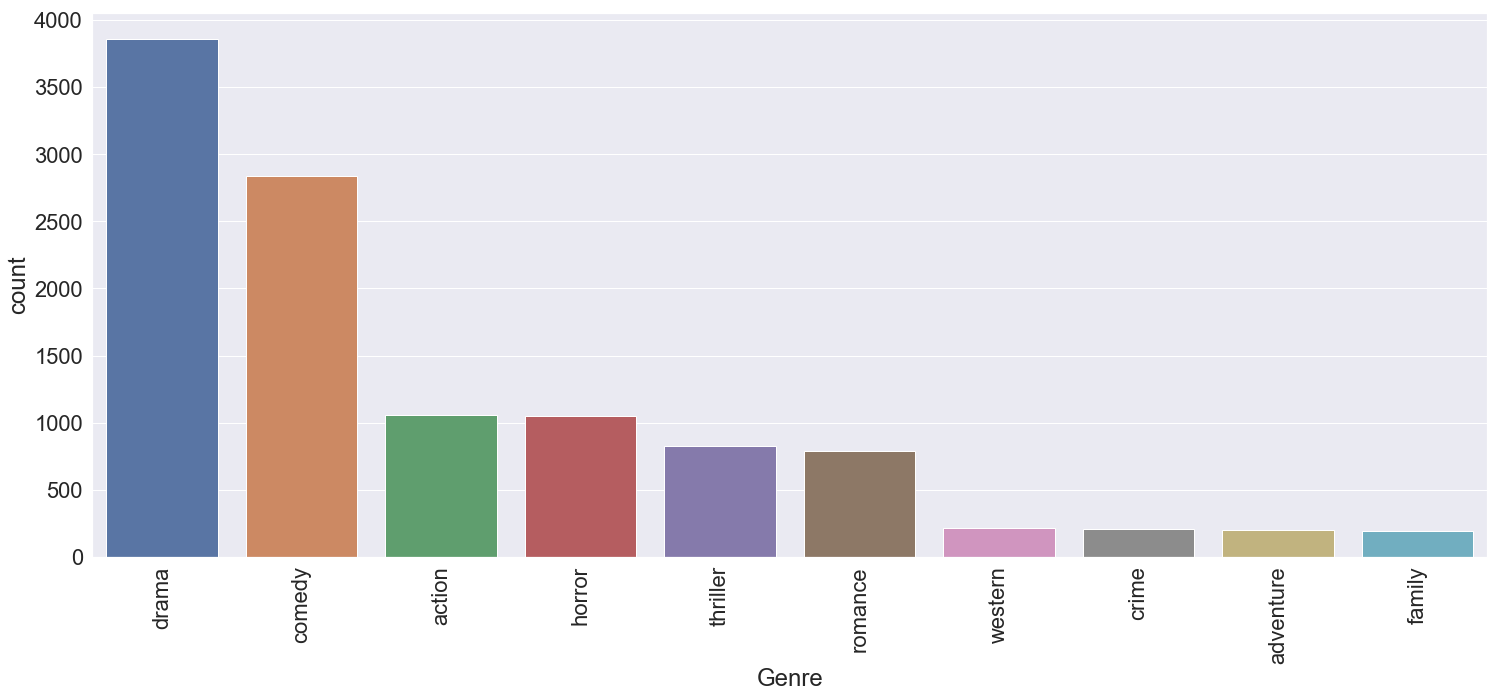

In [333]:
#genre_df = movies.groupby('Genre')
#genre_df.head()
genre = movies['Genre'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = movies['Genre'], order = genre, ax = ax)
sns.set(font_scale=1)
plt.xticks(rotation = 90)
plt.show()

In [261]:
df = movies.copy()
df = df.reset_index()

In [262]:
df.head()

,index,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,cluster
0,7340,1960,The Dark at the Top of the Stairs,American,Delbert Mann,"Robert Preston, Dorothy McGuire, Eve Arden, Sh...",drama,https://en.wikipedia.org/wiki/The_Dark_at_the_...,"During Prohibition in Oklahoma, Rubin Flood is...",0
1,7341,1960,Desire in the Dust,American,Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett",drama,https://en.wikipedia.org/wiki/Desire_in_the_Dust,"Lonnie Wilson (Ken Scott), the son of a sharec...",3
2,7343,1960,Elmer Gantry,American,Richard Brooks,"Burt Lancaster, Jean Simmons, Arthur Kennedy, ...",drama,https://en.wikipedia.org/wiki/Elmer_Gantry_(film),Elmer Gantry (Burt Lancaster) is a hard-drinki...,2
3,7345,1960,Exodus,American,Otto Preminger,"Paul Newman, Eva Marie Saint, Ralph Richardson...",drama,https://en.wikipedia.org/wiki/Exodus_(1960_film),"Nurse Katherine ""Kitty"" Fremont is an American...",2
4,7346,1960,The Facts of Life,American,Melvin Frank,"Bob Hope, Lucille Ball, Ruth Hussey",comedy,https://en.wikipedia.org/wiki/The_Facts_of_Lif...,"As the yearly vacation of six neighbors, the G...",3


In [263]:
df.Plot = df.Plot.apply(lambda x: x.lower())
df.Plot = df.Plot.str.replace(r'[^\d\w\s]+', '')
df.Plot = df.Plot.str.replace('\r', '')
df.Plot = df.Plot.str.replace('\n', '')
df.Plot = df.Plot.str.replace('[^A-Za-z]', ' ')

In [264]:
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

In [265]:
stop_words = set(stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

df['stemmed'] = df.Plot.apply(lambda x: stemmer.stem(x))
df['tokens'] = df.stemmed.apply(lambda x: tokenizer.tokenize(x))
df['lemmed'] = df.tokens.apply(lemmatize_text)
df['stopped'] = df.lemmed.apply(lambda x: [item for item in x if item not in stop_words])


In [269]:
from sklearn.feature_extraction.text import CountVectorizer

data = df.stopped.astype('str')

matrix = CountVectorizer(max_features=2000, stop_words='english')
vectorizer = matrix.fit_transform(data)
feats = matrix.get_feature_names()
counts_df = pd.DataFrame(vectorizer.toarray(), columns=list(matrix.get_feature_names()))
counts_df.shape

(11240, 2000)

In [270]:
counts_df['Plot'] = df['Plot']
counts_df['Genre'] = df['Genre']
counts_df.head()

,abandon,abandoned,abby,ability,able,abuse,abusive,accept,accepted,accepts,...,yard,year,yearold,york,young,younger,youth,zombie,Plot,Genre
0,0,0,0,0,0,0,0,1,0,0,...,0,2,0,0,0,1,0,0,during prohibition in oklahoma rubin flood is ...,drama
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,lonnie wilson ken scott the son of a sharecrop...,drama
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,elmer gantry burt lancaster is a harddrinking ...,drama
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,1,0,0,nurse katherine kitty fremont is an american v...,drama
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,as the yearly vacation of six neighbors the gi...,comedy


In [281]:
cluster_range = range(1, 20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(vectorizer.toarray())
    cluster_errors.append(clusters.inertia_)

In [282]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

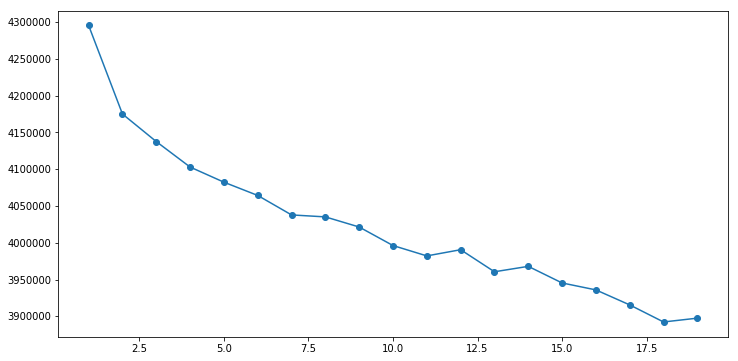

In [284]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [356]:
# KMEANS with countvectorizer data
from sklearn.cluster import KMeans

X = counts.iloc[:, :2001]
y = counts.iloc[:, 2001]

kmeans = KMeans(n_clusters = 10, n_jobs = -1)
kmeans.fit(vectorizer.toarray())

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [357]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(columns[word] for word in centroid))

0 : hank, king, walk, pleads, telling, hunt, carry, manages, evil, kiss
1 : jones, hank, telling, walk, join, scenes, carry, says, hoping, willing
2 : government, perfect, moves, hank, late, fish, passengers, knocked, road, manages
3 : josh, hank, walk, telling, hunt, hoping, declares, game, lawrence, fight
4 : hank, walk, telling, fight, hunt, hoping, declares, mountain, complete, game
5 : hank, fight, walk, telling, game, feel, lovers, declares, mountain, hoping
6 : jason, stop, screams, telling, asks, kong, war, drinks, think, walk
7 : hank, lily, lovers, fish, walk, game, feel, fight, manages, complete
8 : jason, hank, telling, walk, fight, newly, lily, feel, lawrence, turn
9 : friendship, high, hank, telling, walk, hoping, pleads, chinese, carry, king


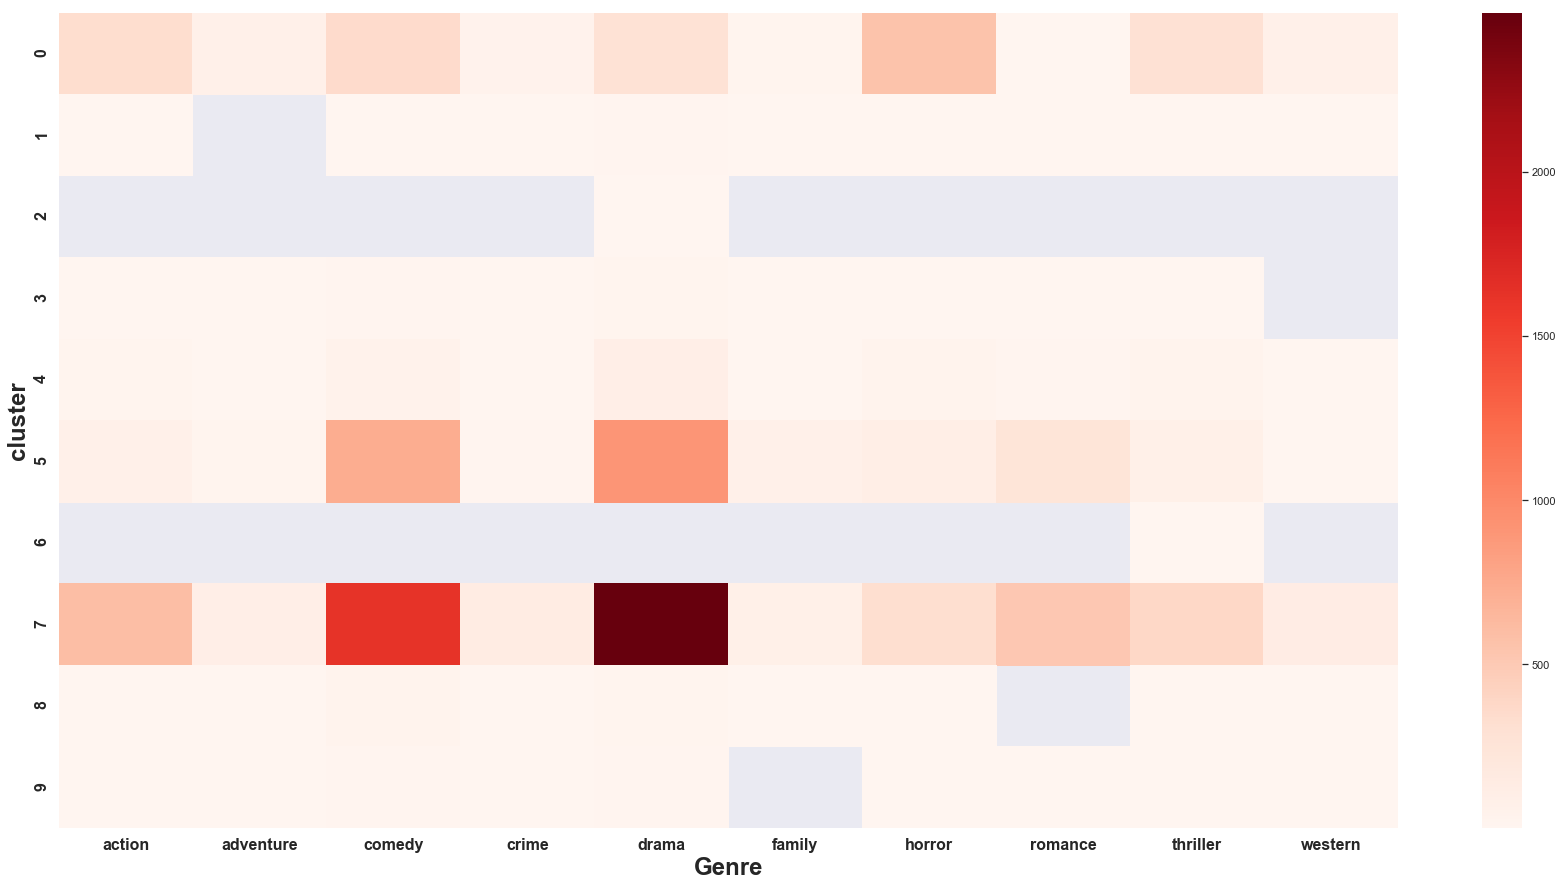

In [359]:
movies['cluster'] = kmeans.labels_
clusters = movies.groupby(['cluster', 'Genre']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'Genre'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('Genre', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

In [338]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(vectorizer.toarray(), quantile=0.2, n_samples=2000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
ms.fit(vectorizer.toarray())

MeanShift(bandwidth=17.934431122936804, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=-1, seeds=None)

In [339]:
labels = ms.labels_
n_clusers_ = len(np.unique(labels))
print(n_clusers_)

155


In [340]:
common_words = ms.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(columns[word] for word in centroid))

0 : hank, lily, walk, lovers, fight, game, fish, feel, complete, manages
1 : joins, jason, raju, hank, memories, newly, world, war, called, carries
2 : manages, carry, walk, babu, declines, woods, rocky, hank, drive, letters
3 : giving, karen, age, telling, hank, training, hoping, playing, hunt, live
4 : sam, fighting, months, mrs, birthday, lets, josh, mia, guilty, drives
5 : lives, journalist, hank, plant, game, start, chase, mexican, dennis, deliver
6 : open, jimmy, fight, lovers, telling, screams, asks, hours, park, plan
7 : rural, friendship, pays, josh, months, leo, shock, michael, workers, letters
8 : bullet, high, tears, entire, played, newly, charges, game, couples, paris
9 : christopher, grandmother, short, carry, photos, music, suddenly, earlier, rape, searches
10 : romantic, finds, urges, whereabouts, london, anthony, rush, ring, memories, begin
11 : bed, woods, artist, destroy, buddy, lovers, mountain, road, owner, films
12 : government, joan, approaches, goodbye, believe,

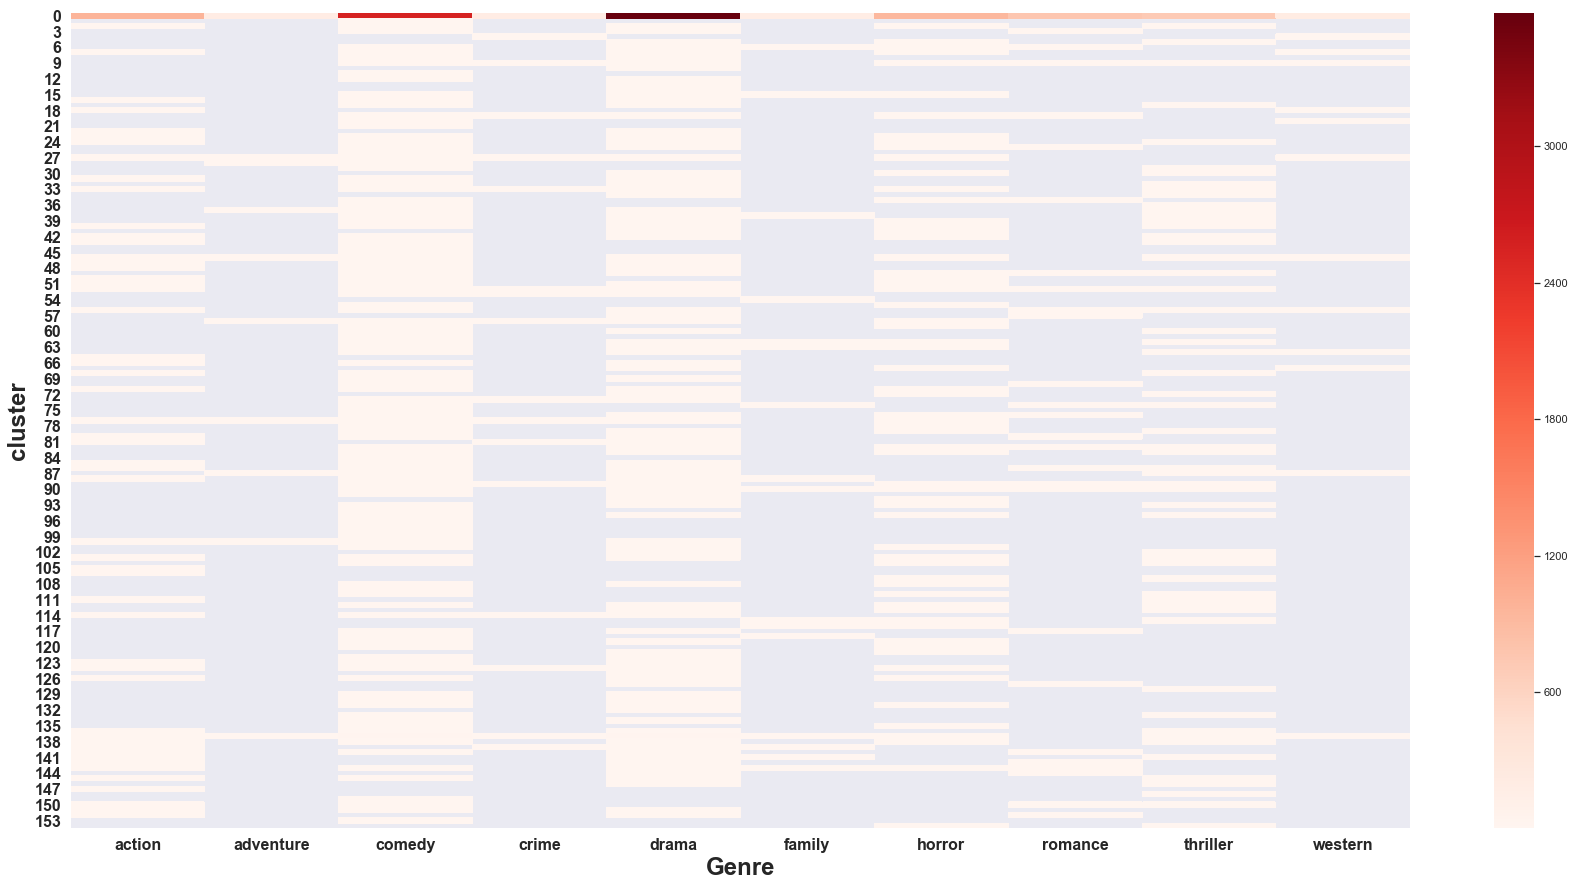

In [360]:
movies['cluster'] = ms.labels_
clusters = movies.groupby(['cluster', 'Genre']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'Genre'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('Genre', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

In [353]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

counts_df['clusters'] = kmeans.labels_

rfc = ensemble.RandomForestClassifier()
Y = counts_df['Genre']
X = counts_df.drop(['Genre','Plot'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=0)
train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 0.9862099644128114

Test set score: 0.43416370106761565


In [354]:
importance = pd.DataFrame()
importance['features'] = X_train.columns
importance['scores'] = rfc.feature_importances_

importance.sort_values('scores', ascending=False).head(10)

,features,scores
981,kill,0.008540
1078,love,0.006085
982,killed,0.004689
1043,life,0.004678
458,death,0.004204
777,ha,0.004168
630,fall,0.003931
984,killing,0.003814
210,body,0.003577
1996,young,0.003407


In [304]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=100, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

words = word_vectorizer.fit_transform(data)
features = word_vectorizer.get_feature_names()
tfidf_data = pd.DataFrame(words.toarray(), columns = list(word_vectorizer.get_feature_names()))

In [305]:
tfidf_data['Genre'] = df['Genre']

Index(['abandon', 'abandoned', 'abducted', 'ability', 'able', 'aboard',
       'abortion', 'abruptly', 'absence', 'abuse',
       ...
       'wrote', 'yard', 'year', 'yearold', 'yell', 'york', 'young', 'younger',
       'youth', 'Genre'],
      dtype='object', length=2784)

In [314]:
cluster_range = range(1, 20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(words.toarray())
    cluster_errors.append(clusters.inertia_)

In [315]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,10831.661755
1,2,10776.233112
2,3,10740.618417
3,4,10715.820075
4,5,10691.598480
5,6,10653.662737
6,7,10630.364824
7,8,10608.444966
8,9,10587.850919
9,10,10560.845836


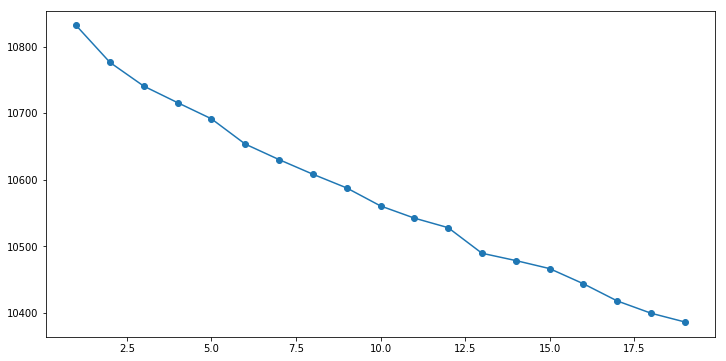

In [316]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [310]:
kmeans = KMeans(n_clusters = 10, n_jobs = -1)
kmeans.fit(words.toarray())

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [311]:
tfidf_data['clusters'] = kmeans.labels_

rfc = ensemble.RandomForestClassifier()
Y = tfidf_data['Genre']
X = tfidf_data.drop(['Genre'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.4,
                                                    random_state=0)
train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 0.9848754448398577

Test set score: 0.42037366548042704


In [312]:
importance = pd.DataFrame()
importance['features'] = X_train.columns
importance['scores'] = rfc.feature_importances_

importance.sort_values('scores', ascending=False).head(10)

,features,scores
1498,love,0.009053
1381,kill,0.007867
1454,life,0.006081
867,escape,0.005999
1382,killed,0.005735
2783,clusters,0.005292
651,death,0.004128
1824,police,0.004096
2315,son,0.004087
2780,young,0.003621


In [27]:
import gensim
from gensim.models import word2vec

model = word2vec.Word2Vec(
    data,
    workers=4,     # Number of threads to run in parallel (if your computer does parallel processing).
    min_count=10,  # Minimum word count threshold.
    window=6,      # Number of words around target word to consider.
    sg=0,          # Use CBOW because our corpus is small.
    sample=1e-3 ,  # Penalize frequent words.
    size=300,      # Word vector length.
    hs=1           # Use hierarchical softmax.
)

print('done!')

done!


In [28]:
# List of words in model.
vocab = model.wv.vocab.keys()
vocab

dict_keys(['[', "'", 'p', 'r', 'o', 'h', 'i', 'b', 't', 'n', ',', ' ', 'k', 'l', 'a', 'm', 'u', 'f', 'd', 's', 'c', 'e', 'w', 'v', 'j', 'g', 'y', 'x', 'z', 'q', ']'])

In [28]:
# KMEANS with TFIDF data
from sklearn.cluster import KMeans

#X = tfidf_data.iloc[:, :3000]
#y = tfidf_data.iloc[:, 48099]

kmeans = KMeans(n_clusters = 10, n_jobs = -1)
kmeans.fit(words)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [313]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(features[word] for word in centroid))

0 : michael, village, villager, father, son, wa, wife, life, young, story
1 : mother, father, wa, house, family, school, child, home, tell, life
2 : love, family, father, marriage, fall, son, brother, come, friend, marry
3 : police, kill, wa, men, escape, killed, gang, officer, man, car
4 : film, story, movie, life, character, love, role, woman, played, play
5 : john, paul, mike, sam, max, billy, wa, tell, house, home
6 : life, woman, new, friend, man, wife, young, wa, team, family
7 : joe, harry, george, wa, new, father, friend, money, home, wife
8 : ben, house, car, tell, family, wa, home, martin, friend, school
9 : jack, father, wa, tell, new, life, try, wife, boy, home


In [31]:
movies['cluster'] = kmeans.labels_

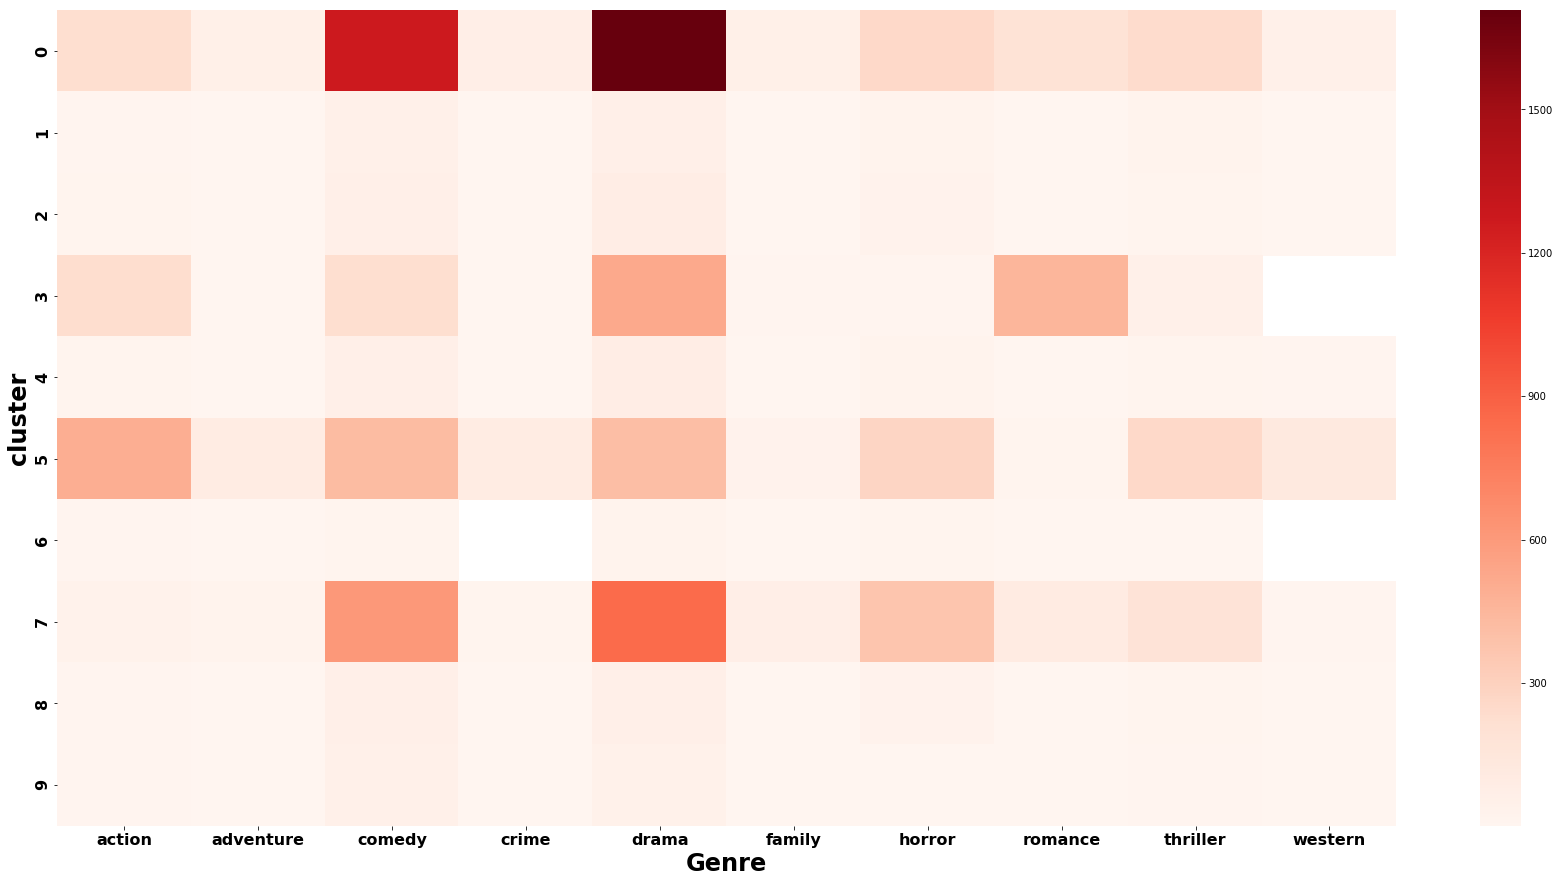

In [32]:
clusters = movies.groupby(['cluster', 'Genre']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'Genre'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('Genre', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")